In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv
/kaggle/input/salesforecast/Saleforecast.webp


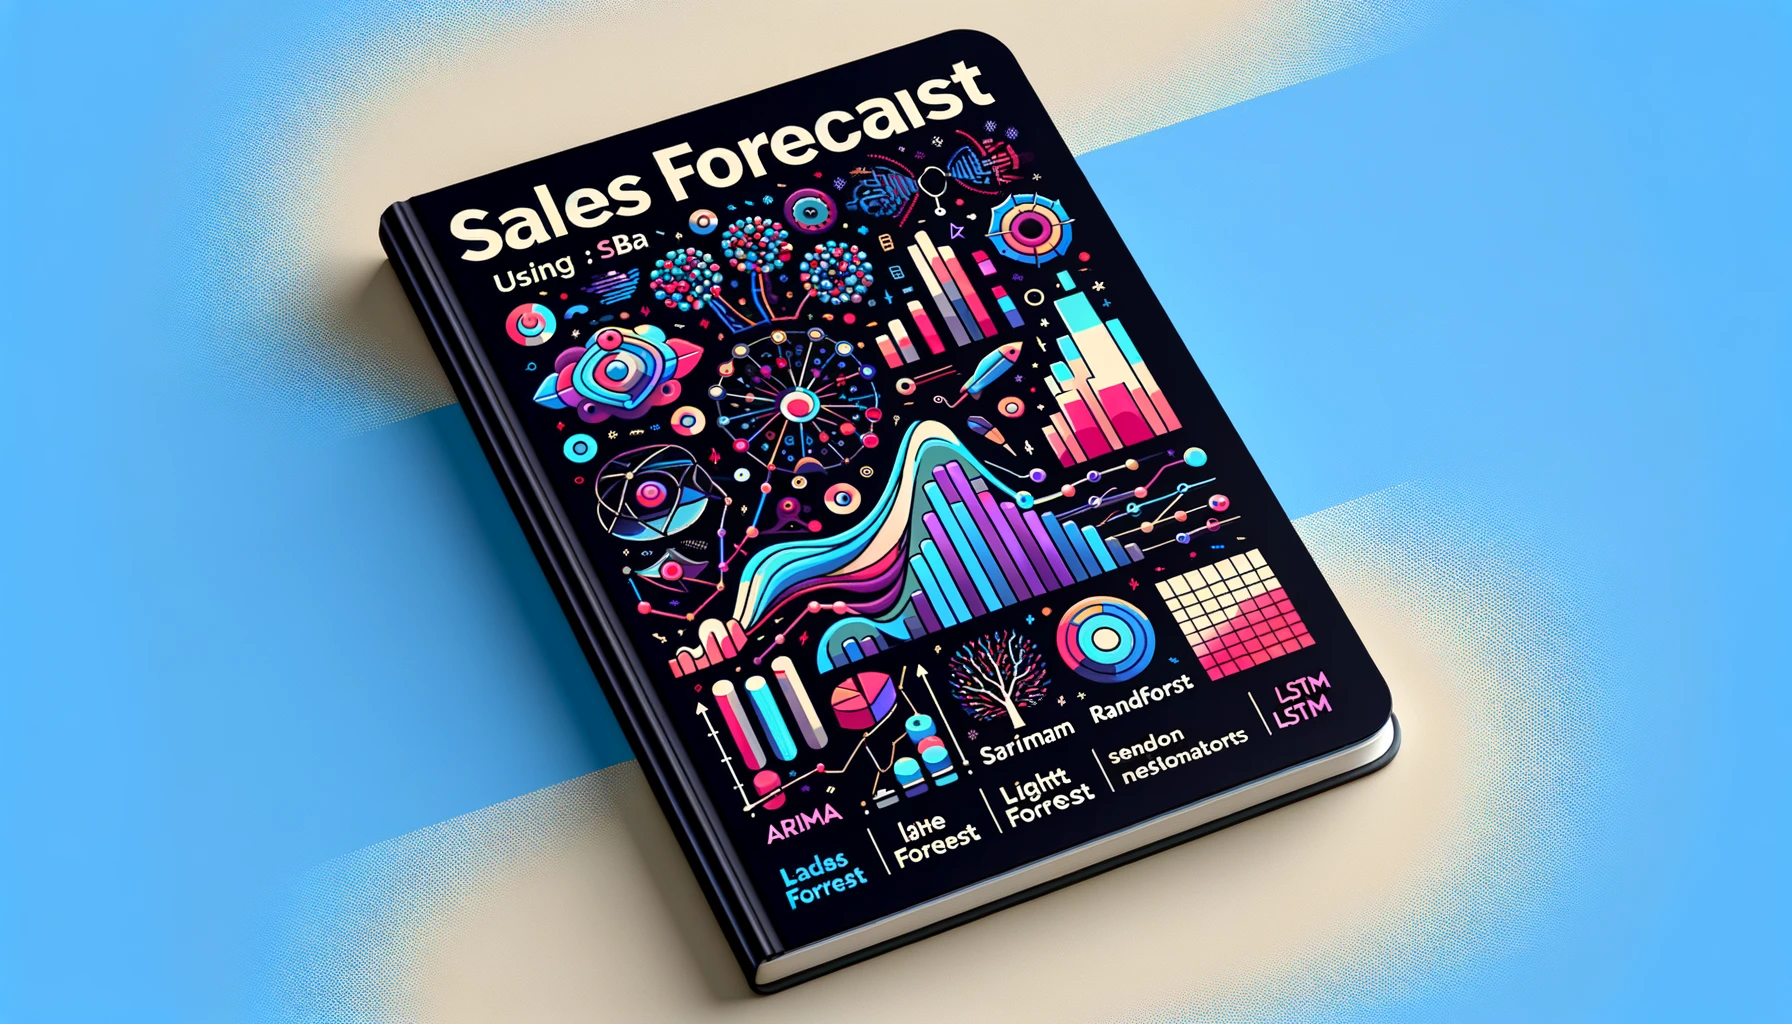

In [2]:
from PIL import Image as PILImage
from IPython.display import display

# Load the WebP image using PIL
image_filename = '/kaggle/input/salesforecast/Saleforecast.webp'
webp_image = PILImage.open(image_filename)

# Convert the image to RGB format (required for PNG)
rgb_image = webp_image.convert('RGB')

# Display the image
display(rgb_image)

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Attribute</b></th>
            <th><b>Details</b></th>
        </tr>
        <tr>
            <td><b>Author</b></td>
            <td><b>Rizwan</b></td>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Rizwankaka"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/rizwan-rizwan-1351a650/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
            <td>Twitter</td>
            <td><a href="https://twitter.com/RizwanRizwan_"><img src="https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter" alt="Twitter"/></a></td>
        </tr>
        <tr>
            <td>Facebook</td>
            <td><a href="https://www.facebook.com/RIZWANNAZEEER"><img src="https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook" alt="Facebook"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="mailto:riwan.rewala@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>

<h1 style="font-size: 35px; font-style: Bold; color: black;">Sales Forecating with TimeSeries, ARIMA, SARIMA, LightGBM, RandomForest, LSTM</h1>


# **About Dataset**
### **Context**
Retail dataset of a global superstore for 4 years.
Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset!

### **Content**
Time series analysis deals with time series based data to extract patterns for predictions and other characteristics of the data. It uses a model for forecasting future values in a small time frame based on previous observations. It is widely used for non-stationary data, such as economic data, weather data, stock prices, and retail sales forecasting.

### **Dataset**
The dataset is easy to understand and is self-explanatory

### **Inspiration**
Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset!

# Importing Necessary Libraries 

In [3]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings("ignore") # suppressing warnings

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
2024-03-23 05:05:19.288062: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 05:05:19.288182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 05:05:19.428312: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [7]:
# getting more information from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
# checking how many rows and columns in the dataset
df.shape

(9800, 18)

In [9]:
# statistical summary
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [10]:
# printing the column names in the data
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [11]:
# data types of columns
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

# Cleaning Dataset by Removing Missing Values & Duplicates

In [12]:
df.isnull().sum().sort_values(ascending=False)

Postal Code      11
Row ID            0
Order ID          0
Order Date        0
Ship Mode         0
Ship Date         0
Customer Name     0
Segment           0
Country           0
Customer ID       0
City              0
State             0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
df.duplicated().any() # use df.drop_duplicates(inplace=True) -> if any duplicates exist in the dataframe

False

In [14]:
# removing missing values
df.dropna(axis=0, inplace=True)

# Customer Segmentation Analysis

In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [16]:
features = df[['Segment','Country','City','State','Sales']]
top_10_sales = features.nlargest(10, 'Sales')
print('Top 10 Sales Revenue')
print(top_10_sales[['Segment','Country','City','State','Sales']])

Top 10 Sales Revenue
          Segment        Country           City         State      Sales
2697  Home Office  United States   Jacksonville       Florida  22638.480
6826    Corporate  United States      Lafayette       Indiana  17499.950
8153     Consumer  United States        Seattle    Washington  13999.960
2623  Home Office  United States  New York City      New York  11199.968
4190     Consumer  United States         Newark      Delaware  10499.970
9039     Consumer  United States        Detroit      Michigan   9892.740
4098     Consumer  United States    Minneapolis     Minnesota   9449.950
4277    Corporate  United States       Lakewood    New Jersey   9099.930
8488     Consumer  United States      Arlington      Virginia   8749.950
6425     Consumer  United States   Philadelphia  Pennsylvania   8399.976


**->** The above code analyzes sales data, focusing on revenue. It ranks sales across customer segments, countries, cities, and states. It picks the top 10 highest-selling instances and displays details like city, state, and customer segment for each.

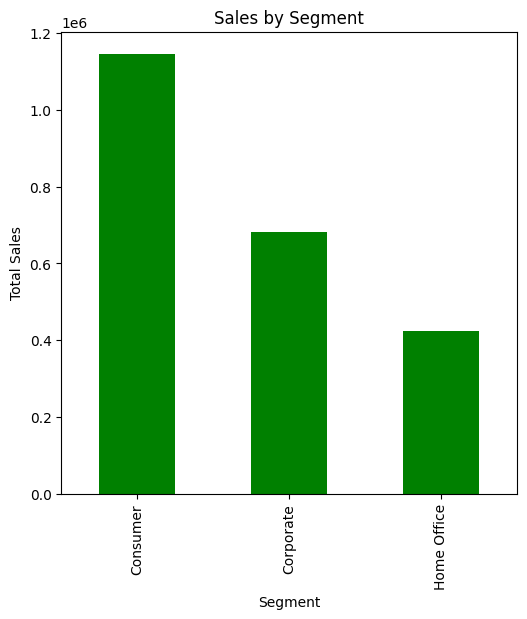

In [17]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.subplot(1,3,1)
segment_sales.plot(kind='bar',color='green')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

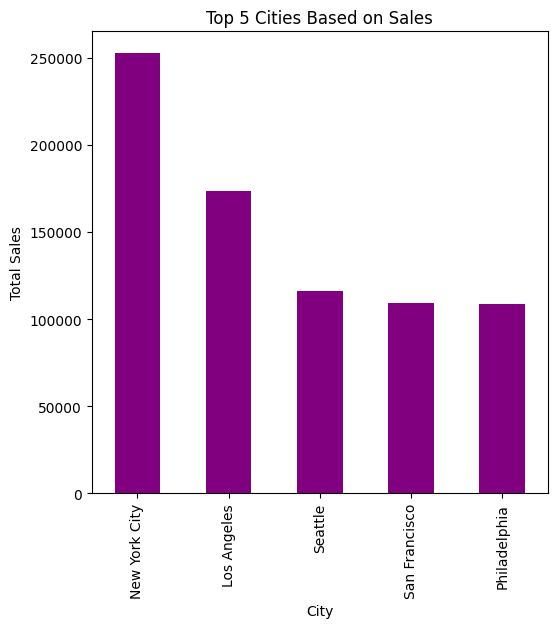

In [18]:
segment_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(20,6))
plt.subplot(1,3,2)
segment_sales.plot(kind='bar',color='purple')
plt.title('Top 5 Cities Based on Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

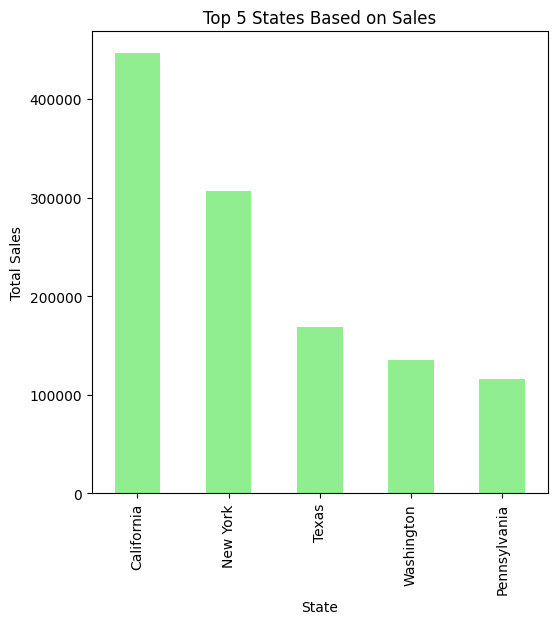

In [19]:
segment_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(20,6))
plt.subplot(1,3,3)
segment_sales.plot(kind='bar',color='lightgreen')
plt.title('Top 5 States Based on Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

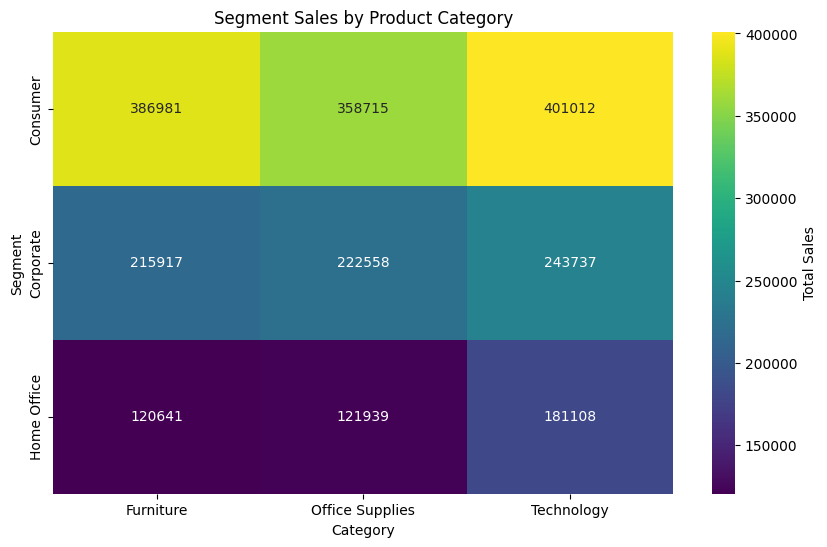

In [20]:
heatmap_data = df.pivot_table(index='Segment', columns='Category', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.0f', cbar_kws={'label':'Total Sales'})
plt.title("Segment Sales by Product Category")
plt.show()

**->** This heatmap represents Segment Sales by Product Category. It shows three customer segments: Consumer, Corporate, and Home Office, and their corresponding sales in three different product categories: Furniture, Office Supplies, and Technology. The colors indicate the sales volume, with darker colors representing higher sales. Consumers have the highest sales in all categories, particularly in Technology with 401,012 units. Corporate sales are moderate, with Technology again leading at 243,737 units. Home Office has the lowest sales, with a higher number in Technology at 181,108 units. The right-hand side scale indicates the total sales numbers, which correspond to the color intensity of each segment-category intersection.

# Analyzing Order Fulfilment Efficiency

In [21]:
# converting into datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Processing Time'] = (df['Ship Date']- df['Order Date']).dt.days
median_processing_time =df.groupby('Sub-Category')['Processing Time'].median().sort_values()
print('Median Processing Time for each Product Sub-Category')
print(median_processing_time)

Median Processing Time for each Product Sub-Category
Sub-Category
Accessories    4.0
Appliances     4.0
Art            4.0
Binders        4.0
Bookcases      4.0
Chairs         4.0
Copiers        4.0
Envelopes      4.0
Fasteners      4.0
Furnishings    4.0
Labels         4.0
Machines       4.0
Paper          4.0
Phones         4.0
Storage        4.0
Supplies       4.0
Tables         4.0
Name: Processing Time, dtype: float64


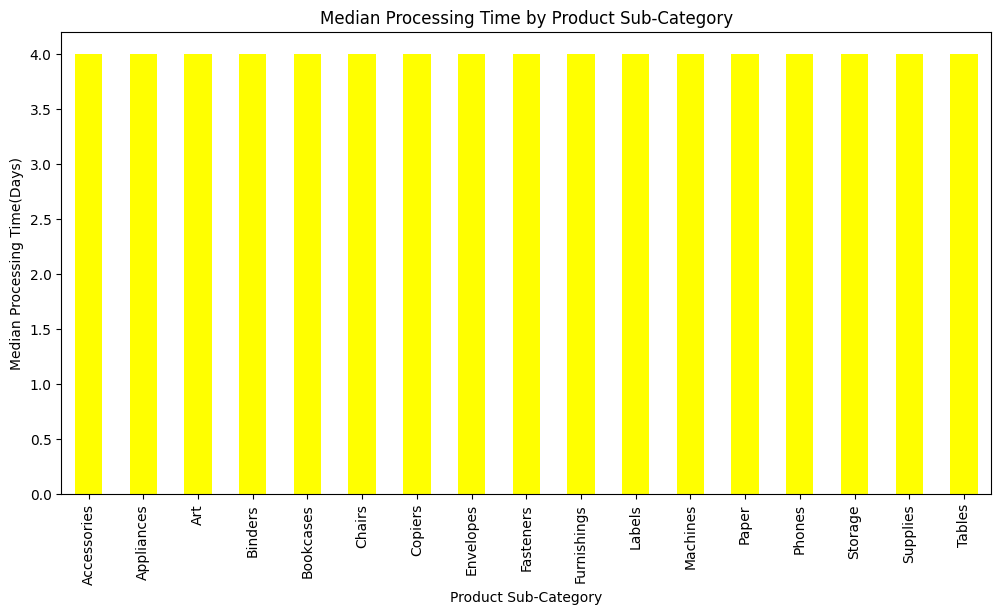

In [22]:
plt.figure(figsize=(12,6))
median_processing_time.plot(kind='bar',color='yellow')
plt.title('Median Processing Time by Product Sub-Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Median Processing Time(Days)')
plt.show()

# Analyzing Sales Performance Trend

In [23]:
# converting into datetime format
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

In [24]:
highest_selling_product = df.groupby(['Year', 'Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the index of the row with the highest sales in each year
idx = highest_selling_product.groupby('Year')['Sales'].idxmax()

# Select the corresponding rows
highest_selling_product = highest_selling_product.loc[idx]

print('Best Performance Product Category and Sub Category for Each Year')
print(highest_selling_product[['Year', 'Category', 'Sub-Category', 'Sales']])


Best Performance Product Category and Sub Category for Each Year
    Year    Category Sub-Category       Sales
16  2015  Technology       Phones   77225.956
18  2016   Furniture       Chairs   69939.473
35  2017   Furniture       Chairs   81930.345
67  2018  Technology       Phones  104685.658


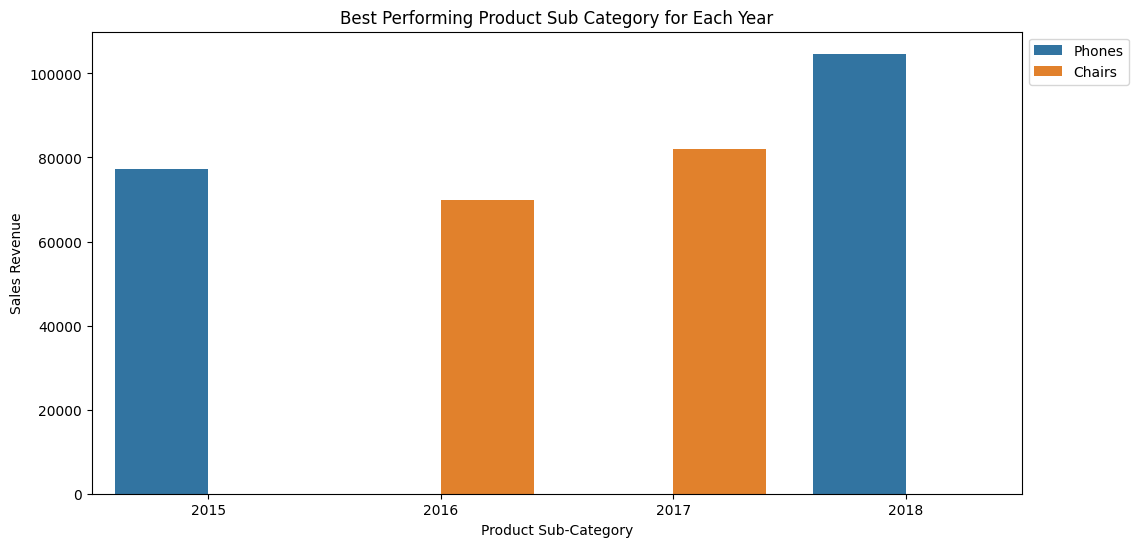

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Sales', hue='Sub-Category', data=highest_selling_product)
plt.title('Best Performing Product Sub Category for Each Year')
plt.xlabel('Product Sub-Category')
plt.ylabel('Sales Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# Forecasting Sales with ARIMA

In [26]:
#pip install pmdarima

In [27]:
# sorting date
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y')
sorted_date = df["Order Date"].sort_values()
print(sorted_date)

7980   2015-01-03
741    2015-01-04
740    2015-01-04
739    2015-01-04
1759   2015-01-05
          ...    
906    2018-12-30
908    2018-12-30
907    2018-12-30
1296   2018-12-30
5091   2018-12-30
Name: Order Date, Length: 9789, dtype: datetime64[ns]


In [28]:
from pmdarima import auto_arima
sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index()

# Define a function to forecast sales for each category
def forecast_sales(category_data):
    sales_series = category_data.set_index("Order Date")["Sales"]
    model = auto_arima(sales_series, seasonal=True, suppress_warnings=True, stepwise=True)
    forecast = model.predict(n_periods=1)
    return pd.Series({
        "Category": category_data["Category"].iloc[0],
        "Forecasted_Sales_2019": forecast.sum()
    })

# Applying the forecast_sales function to each category group
forecasted_sales = sales_by_category.groupby("Category").apply(forecast_sales).reset_index(drop=True)

# Formatting the Forecasted_Sales_2019 column
forecasted_sales["Forecasted_Sales_2019"] = forecasted_sales["Forecasted_Sales_2019"].apply(lambda x: '{:,.2f}'.format(x))

# Displaying the result
print("Forecasted Sales in 2019 for Each Product Category:")
print(forecasted_sales[["Category", "Forecasted_Sales_2019"]])

Forecasted Sales in 2019 for Each Product Category:
          Category Forecasted_Sales_2019
0        Furniture            180,884.62
1  Office Supplies            175,803.21
2       Technology            206,464.03


# Forecasting Sales with SARIMA

In [29]:
#pip install statsmodels

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index()

# Define a function to forecast sales for each category using SARIMAX
def forecast_sales(category_data):
    sales_series = category_data.set_index("Order Date")["Sales"]
    sarima_model = SARIMAX(sales_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit()
    forecast = sarima_results.get_forecast(steps=1).predicted_mean
    return pd.Series({
        "Category": category_data["Category"].iloc[0],
        "Forecasted_Sales_2019": forecast.iloc[0]
    })

# Applying the forecast_sales function to each category group
forecasted_sales = sales_by_category.groupby("Category").apply(forecast_sales).reset_index(drop=True)

# Formatting the Forecasted_Sales_2019 column
forecasted_sales["Forecasted_Sales_2019"] = forecasted_sales["Forecasted_Sales_2019"].apply(lambda x: '{:,.2f}'.format(x))

# Displaying the result
print("Forecasted Sales in 2019 for Each Product Category:")
print(forecasted_sales[["Category", "Forecasted_Sales_2019"]])


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


# Forecasting Sales with LightGBM

In [31]:
#pip install lightgbm scikit-learn

In [32]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index()
forecasted_sales_list = []  # List to store individual DataFrames
target_year = 2020

# Fitting lightgbm model
for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    category_data["Order Date"] = pd.to_datetime(category_data["Order Date"])
    category_data["Year"] = category_data["Order Date"].dt.year
    train_data, valid_data = train_test_split(category_data, test_size=0.2, shuffle=False)
    features = ["Year"]
    target = "Sales"
    train_dataset = lgb.Dataset(train_data[features], label=train_data[target])
    params = {
        "objective": "regression",
        "metric": "mse",
        "boosting_type": "gbdt",
        "num_leaves": 31,
        "learning_rate": 0.05
    }
    model = lgb.train(params, train_dataset, num_boost_round=1000)
    forecast_data = pd.DataFrame({"Year": [target_year]})
    forecast = model.predict(forecast_data)
    
    # Append individual DataFrames to the list
    forecasted_sales_list.append(pd.DataFrame({
        "Category": [category],
        "Forecasted_Sales_2020": forecast.sum()
    }))

# Concatenate individual DataFrames into the final result
forecasted_sales = pd.concat(forecasted_sales_list, ignore_index=True)

# Format the Forecasted_Sales_2020 column
forecasted_sales["Forecasted_Sales_2020"] = forecasted_sales["Forecasted_Sales_2020"].apply(lambda x: '{:,.2f}'.format(x))

print("Forecasted Sales in 2020 for Each Product Category:")
print(forecasted_sales[["Category", "Forecasted_Sales_2020"]])

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 170408.229167
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

# Forecasting Sales with Random Forest

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Grouping the data and resetting index
sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index(name="Sales")

# Initialize the DataFrame outside the loop
forecasted_sales = pd.DataFrame(columns=["Category", "Forecasted_Sales_2020"])
target_year = 2020

for category in sales_by_category["Category"].unique():
    # Filter data for the current category
    category_data = sales_by_category[sales_by_category["Category"] == category]
    
    # Ensure that 'Order Date' is interpreted as an integer (year), not a date
    category_data = category_data.rename(columns={"Order Date": "Year"})
    
    # Split the data into training and validation sets
    train_data, valid_data = train_test_split(category_data, test_size=0.2, shuffle=False)
    
    # Define features and target
    features = ["Year"]  # 'Year' instead of 'Order Date'
    target = "Sales"
    
    # Instantiate and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_data[features], train_data[target])
    
    # Create forecast data for the target year
    forecast_data = pd.DataFrame({
        "Year": [target_year]
    })
    
    # Predicting the sales for the target year
    forecast = model.predict(forecast_data)
    
    # Create a DataFrame for the new row
    new_row = pd.DataFrame({
        "Category": [category],
        "Forecasted_Sales_2020": [forecast[0]]
    })
    
    # Appending the new row to the forecasted_sales DataFrame
    forecasted_sales = pd.concat([forecasted_sales, new_row], ignore_index=True)

# Formatting the 'Forecasted_Sales_2020' column to have commas and two decimal places
forecasted_sales["Forecasted_Sales_2020"] = forecasted_sales["Forecasted_Sales_2020"].apply(lambda x: '{:,.2f}'.format(x))

# Printing the forecasted sales for each category for the year 2020
print("Forecasted Sales in 2020 for Each Product Category:")
print(forecasted_sales)


Forecasted Sales in 2020 for Each Product Category:
          Category Forecasted_Sales_2020
0        Furniture            183,151.29
1  Office Supplies            165,439.57
2       Technology            201,322.38


# Forecasting Sales with LSTM

In [34]:
#pip install tensorflow

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Grouping the data and resetting the index
sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index()

# Initialize the DataFrame outside the loop
forecasted_sales = pd.DataFrame(columns=["Category", "Forecasted_Sales_2020"])
target_year = 2020

for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    
    # Scale the 'Sales' data
    scaler = MinMaxScaler()
    category_data['Sales'] = scaler.fit_transform(category_data['Sales'].values.reshape(-1, 1))
    
    # Prepare the features and target for the LSTM model
    X = category_data['Sales'].values
    y = category_data['Sales'].values
    X = X.reshape((X.shape[0], 1, 1))
    
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # Fit the model
    model.fit(X, y, epochs=100, batch_size=16, verbose=0)
    
    # Prepare the forecast data
    forecast_data = np.array([scaler.transform([[target_year]])])
    forecast_data = forecast_data.reshape((1, 1, 1))
    
    # Make the forecast
    forecast = model.predict(forecast_data)
    forecast = scaler.inverse_transform(forecast.reshape(-1, 1))[0][0]
    
    # Add the forecast to the forecasted_sales DataFrame
    new_row = pd.DataFrame({
        "Category": [category],
        "Forecasted_Sales_2020": [forecast]
    })
    forecasted_sales = pd.concat([forecasted_sales, new_row], ignore_index=True)

# Format the 'Forecasted_Sales_2020' column
forecasted_sales["Forecasted_Sales_2020"] = forecasted_sales["Forecasted_Sales_2020"].apply(lambda x: '{:,.2f}'.format(x))

# Print the forecasted sales
print("Forecasted Sales in 2020 for Each Product Category:")
print(forecasted_sales)

I0000 00:00:1711170345.682302      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 0s 405ms/step
Forecasted Sales in 2020 for Each Product Category:
          Category Forecasted_Sales_2020
0        Furniture            133,715.95
1  Office Supplies            122,085.00
2       Technology            150,141.72


# Calculating Mean Absolute Error & Conducting Residual Analysis

In [36]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Grouping the data and resetting the index
sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index()

# Initialize the DataFrame outside the loop
forecasted_sales = pd.DataFrame(columns=["Category", "Forecasted_Sales_2020"])
target_year = 2020

for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    category_data = category_data.assign(Year=pd.to_datetime(category_data["Order Date"]).dt.year)
    train_data, valid_data = train_test_split(category_data, test_size=0.2, shuffle=False)
    features = ["Year"]
    target = "Sales"
    
    train_dataset = lgb.Dataset(train_data[features], label=train_data[target])
    params = {
        "objective": "regression",
        "metric": "mse",
        "boosting_type": "gbdt",
        "num_leaves": 31,
        "learning_rate": 0.05
    }
    
    model = lgb.train(params, train_dataset, num_boost_round=1000)
    forecast_data = pd.DataFrame({
        "Year": [target_year]
    })
    
    forecast = model.predict(forecast_data)
    new_row = pd.DataFrame({
        "Category": [category],
        "Forecasted_Sales_2020": [forecast.sum()]
    })
    forecasted_sales = pd.concat([forecasted_sales, new_row], ignore_index=True)

forecasted_sales["Forecasted_Sales_2020"] = forecasted_sales["Forecasted_Sales_2020"].apply(lambda x: '{:,.2f}'.format(x))
print("Forecasted Sales in 2020 for Each Product Category:")
print(forecasted_sales)

result = []
for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    category_data = category_data.assign(Year=pd.to_datetime(category_data["Order Date"]).dt.year)
    train_data, valid_data = train_test_split(category_data, test_size=0.2, shuffle=False)
    features = ["Year"]
    target = "Sales"
    
    train_dataset = lgb.Dataset(train_data[features], label=train_data[target])
    model = lgb.train(params, train_dataset, num_boost_round=1000)
    forecast_data = pd.DataFrame({
        "Year": [target_year]
    })
    
    forecast = model.predict(forecast_data)
    true_values = valid_data[target]
    predicted_values = model.predict(valid_data[features])
    mae = mean_absolute_error(true_values, predicted_values)
    residuals = true_values - predicted_values
    result.append({
        "Category": category,
        "True_Values": true_values.values,
        "Predicted_Values": predicted_values,
        "MAE": mae,
        "Residual": residuals.values
    })

for i in result:
    print(f"Product Category: {i['Category']}")
    print(f"True Values: {i['True_Values']}")
    print(f"Predicted_Values: {i['Predicted_Values']}")
    print(f"MAE: {i['MAE']}")
    print(f"Residual: {i['Residual']}")


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 170408.229167
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

# Conclusion & Summary

The output presents the results of forecasting sales for three product categories using a LightGBM model. Here are some observations:

1. **Furniture Category:**
   - The actual sales value (`True Values`) was 212,313.79.
   - The model predicted sales (`Predicted_Values`) of 170,408.23.
   - The Mean Absolute Error (`MAE`) is 41,905.56, which means that, on average, the model's predictions were off by this amount for the Furniture category.
   - The `Residual` (the difference between the true and predicted values) is the same as the MAE because it seems to be based on a single data point, indicating the error for that single prediction.

2. **Office Supplies Category:**
   - The actual sales value was 239,730.36.
   - The predicted sales were significantly lower at 154,494.15.
   - The MAE here is 85,236.21, which is quite high, suggesting that the model's predictions for this category are less accurate than for Furniture.
   - The `Residual` reflects the discrepancy between the actual and predicted sales, similar to the MAE.

3. **Technology Category:**
   - The actual sales value was 269,165.66.
   - The model predicted sales of 185,563.48, which is also quite off from the actual sales.
   - The MAE is 83,602.18, indicating a substantial average error in predictions for the Technology category.
   - The `Residual` mirrors the MAE, showing a single large error for one prediction.

Overall Comments:
- The model appears to consistently underpredict sales across all categories.
- The MAE is relatively large for all categories, suggesting that the model may not have been well-tuned or that the features used (Year alone in this case) were not sufficient for accurate predictions.
- Given that each category seems to have only one true value and one predicted value, it suggests that the validation set may only contain one data point for each category. This is not enough to reliably evaluate the performance of the model. Normally, you would want a larger validation set to assess how well your model generalizes.
- It's also important to consider the scale of the sales values when evaluating the MAE. For example, an MAE of 41,905.56 might be considered more acceptable if the true sales values were in the millions, but the actual sales values are in the lower hundreds of thousands.
- It might be beneficial to revisit the model's features, include more relevant data points, or perform hyperparameter tuning to improve the model's performance. Additionally, cross-validation could give a more robust evaluation of the model's predictive power across different subsets of the data.

**Thanks for Viewing this Notebook!! Rizwan**